In [1]:
%load_ext watermark


In [2]:
from IPython.display import display
from backstrip import backplot
import polars as pl
import seaborn as sns
from teeplot import teeplot as tp


In [3]:
%watermark -diwmuv -iv


Last updated: 2024-11-02T14:43:14.434370+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.5.0-1025-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn: 0.13.2
polars : 1.9.0
teeplot: 1.1.3

Watermark: 2.4.3



## Prep Data


In [4]:
cpu_perf = (
    pl.concat(
        [
            pl.read_parquet(
                "https://osf.io/z65g3/download",
                use_pyarrow=True,
            ).with_columns(
                pl.lit("CPU").alias("hardware"),
                pl.lit("50/50 poisson").alias("experiment design"),
                pl.lit(256 * 81 * 81).alias("net population size"),
            ),
            pl.read_parquet(
                "https://osf.io/tcv9q/download",
                use_pyarrow=True,
            ).with_columns(
                pl.lit("CPU").alias("hardware"),
                pl.lit("de novo poisson").alias("experiment design"),
                pl.lit(256 * 81 * 81).alias("net population size"),
            ),
        ],
    )
    .filter(pl.col("tile") == 0)
    .with_columns(
        (
            pl.col("net population size") / pl.col("tsc seconds per cycle")
        ).alias("throughput (agent-generations/sec)"),
    )
)
display(cpu_perf)
display(cpu_perf.describe())


tsc ticks,tsc seconds,tsc seconds per cycle,tsc cycle hertz,tsc ns per cycle,recv sum,send sum,cycle count,tsc start,tsc end,send N,send S,send E,send W,recv N,recv S,recv E,recv W,tile,row,col,hardware,experiment design,net population size,throughput (agent-generations/sec)
u64,f32,f32,f32,f32,u32,u32,u32,u64,u64,u32,u32,u32,u32,u32,u32,u32,u32,u32,u16,u16,str,str,i32,f64
0,209.579391,0.209579,4.771461,2.09579392e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,8.0142e6
0,229.492737,0.229493,4.357437,2.29492736e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,7.3188e6
0,228.172424,0.228172,4.382651,2.28172416e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,7.3612e6
0,235.708771,0.235709,4.242524,2.35708768e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,7.1258e6
0,247.554077,0.247554,4.039521,2.4755408e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,6.7848e6
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,212.446671,0.212447,4.707064,2.12446672e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""de novo poisson""",1679616,7.9061e6
0,220.222626,0.220223,4.540859,2.2022264e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""de novo poisson""",1679616,7.6269e6
0,240.948883,0.240949,4.150258,2.4094888e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""de novo poisson""",1679616,6.9708e6


statistic,tsc ticks,tsc seconds,tsc seconds per cycle,tsc cycle hertz,tsc ns per cycle,recv sum,send sum,cycle count,tsc start,tsc end,send N,send S,send E,send W,recv N,recv S,recv E,recv W,tile,row,col,hardware,experiment design,net population size,throughput (agent-generations/sec)
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64
"""count""",20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,"""20""","""20""",20.0,20.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0
"""mean""",0.0,235.323624,0.235324,4.269971,2.35323616e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,1.679616e6,7.1719e6
"""std""",0.0,16.729038,0.016729,0.304561,1.6729037e7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,0.0,511544.660551
"""min""",0.0,207.383804,0.207384,3.699954,2.07383808e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""CPU""","""50/50 poisson""",1.679616e6,6.2145e6
"""25%""",0.0,226.40416,0.226404,4.039521,2.2640416e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,1.679616e6,6.7848e6
"""50%""",0.0,236.85994,0.23686,4.242524,2.36859936e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,1.679616e6,7.1258e6
"""75%""",0.0,247.554077,0.247554,4.41688,2.4755408e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,1.679616e6,7.4187e6
"""max""",0.0,270.273621,0.270274,4.821977,2.70273632e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""CPU""","""de novo poisson""",1.679616e6,8.0991e6


In [5]:
cupy_perf = (
    pl.concat(
        [
            pl.read_parquet(
                "https://osf.io/jz3eq/download",
                use_pyarrow=True,
            ).with_columns(
                pl.lit("GPU").alias("hardware"),
                pl.lit("50/50 poisson").alias("experiment design"),
                pl.lit(256 * 243 * 243).alias("net population size"),
            ),
            pl.read_parquet(
                "https://osf.io/ya29p/download",
                use_pyarrow=True,
            ).with_columns(
                pl.lit("GPU").alias("hardware"),
                pl.lit("de novo poisson").alias("experiment design"),
                pl.lit(256 * 243 * 243).alias("net population size"),
            ),
        ],
    )
    .filter(pl.col("tile") == 0)
    .with_columns(
        (
            pl.col("net population size") / pl.col("tsc seconds per cycle")
        ).alias("throughput (agent-generations/sec)"),
    )
)
display(cupy_perf)
display(cupy_perf.describe())


tsc ticks,tsc seconds,tsc seconds per cycle,tsc cycle hertz,tsc ns per cycle,recv sum,send sum,cycle count,tsc start,tsc end,send N,send S,send E,send W,recv N,recv S,recv E,recv W,tile,row,col,hardware,experiment design,net population size,throughput (agent-generations/sec)
u64,f32,f32,f32,f32,u32,u32,u32,u64,u64,u32,u32,u32,u32,u32,u32,u32,u32,u32,u16,u16,str,str,i32,f64
0,2612.250244,0.005225,191.405853,5224500.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""GPU""","""50/50 poisson""",15116544,2.8934e9
0,2717.378662,0.005435,184.000854,5434757.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""GPU""","""50/50 poisson""",15116544,2.7815e9
0,2719.092773,0.005438,183.884872,5438185.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""GPU""","""50/50 poisson""",15116544,2.7797e9
0,2721.032471,0.005442,183.753784,5.442065e6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""GPU""","""50/50 poisson""",15116544,2.7777e9
0,2610.844727,0.005222,191.508911,5221689.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""GPU""","""50/50 poisson""",15116544,2.8950e9
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,2827.758789,0.005656,176.818466,5.655518e6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""GPU""","""de novo poisson""",15116544,2.6729e9
0,2833.894287,0.005668,176.435669,5667788.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""GPU""","""de novo poisson""",15116544,2.6671e9
0,2822.179199,0.005644,177.168045,5644358.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""GPU""","""de novo poisson""",15116544,2.6782e9


statistic,tsc ticks,tsc seconds,tsc seconds per cycle,tsc cycle hertz,tsc ns per cycle,recv sum,send sum,cycle count,tsc start,tsc end,send N,send S,send E,send W,recv N,recv S,recv E,recv W,tile,row,col,hardware,experiment design,net population size,throughput (agent-generations/sec)
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64
"""count""",90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,"""90""","""90""",90.0,90.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0
"""mean""",0.0,2759.198242,0.005518,181.469513,5518396.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,1.5116544e7,2.7432e9
"""std""",0.0,103.762825,0.000208,6.924452,207525.640625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,0.0,1.0467e8
"""min""",0.0,2610.844727,0.005222,170.905243,5221689.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""GPU""","""50/50 poisson""",1.5116544e7,2.5835e9
"""25%""",0.0,2626.729492,0.005253,176.605942,5.253459e6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,1.5116544e7,2.6697e9
"""50%""",0.0,2823.922119,0.005648,177.073914,5.647844e6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,1.5116544e7,2.6767e9
"""75%""",0.0,2831.161865,0.005662,190.350769,5662323.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,1.5116544e7,2.8774e9
"""max""",0.0,2925.5979,0.005851,191.508911,5851195.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""GPU""","""de novo poisson""",1.5116544e7,2.8950e9


In [6]:
wse_perf = pl.concat(
    [
        pl.read_parquet(
            "https://osf.io/h3tu4/download",
            use_pyarrow=True,
        )
        .filter(pl.col("tile") == 749 * 993 - 1)
        .with_columns(
            pl.lit("WSE").alias("hardware"),
            pl.lit("50/50 site-explicit").alias("experiment design"),
            pl.lit(256 * 750 * 994).alias("net population size"),
        ),
        pl.read_parquet(
            "https://osf.io/w97nx/download",
            use_pyarrow=True,
        )
        .filter(pl.col("tile") == 749 * 993 - 1)
        .with_columns(
            pl.lit("WSE").alias("hardware"),
            pl.lit("de novo site-explicit").alias("experiment design"),
            pl.lit(256 * 750 * 994).alias("net population size"),
        ),
        pl.read_parquet(
            "https://osf.io/vh9pb/download",
            use_pyarrow=True,
        )
        .filter(pl.col("tile") == 749 * 993 - 1)
        .with_columns(
            pl.lit("WSE").alias("hardware"),
            pl.lit("50/50 poisson").alias("experiment design"),
            pl.lit(256 * 750 * 994).alias("net population size"),
        ),
        pl.read_parquet(
            "https://osf.io/zp9gt/download",
            use_pyarrow=True,
        )
        .filter(pl.col("tile") == 749 * 993 - 1)
        .with_columns(
            pl.lit("WSE").alias("hardware"),
            pl.lit("de novo poisson").alias("experiment design"),
            pl.lit(256 * 750 * 994).alias("net population size"),
        ),
    ],
).with_columns(
    (pl.col("net population size") / pl.col("tsc seconds per cycle")).alias(
        "throughput (agent-generations/sec)"
    ),
)


In [7]:
df = pl.concat([cpu_perf, cupy_perf, wse_perf])
display(df)
display(df.describe())


tsc ticks,tsc seconds,tsc seconds per cycle,tsc cycle hertz,tsc ns per cycle,recv sum,send sum,cycle count,tsc start,tsc end,send N,send S,send E,send W,recv N,recv S,recv E,recv W,tile,row,col,hardware,experiment design,net population size,throughput (agent-generations/sec)
u64,f32,f32,f32,f32,u32,u32,u32,u64,u64,u32,u32,u32,u32,u32,u32,u32,u32,u32,u16,u16,str,str,i32,f64
0,209.579391,0.209579,4.771461,2.09579392e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,8.0142e6
0,229.492737,0.229493,4.357437,2.29492736e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,7.3188e6
0,228.172424,0.228172,4.382651,2.28172416e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,7.3612e6
0,235.708771,0.235709,4.242524,2.35708768e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,7.1258e6
0,247.554077,0.247554,4.039521,2.4755408e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,6.7848e6
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
103685662536,121.983131,0.000244,4098.927246,243966.265625,1000003,4000008,500000,27523,103685690059,1000002,1000002,1000002,1000002,250001,250000,250001,250001,743756,991,506,"""WSE""","""de novo poisson""",190848000,7.8227e11
103659336568,121.952164,0.000244,4099.968262,243904.328125,1000002,4000008,500000,27559,103659364127,1000002,1000002,1000002,1000002,250000,250000,250001,250001,743756,991,506,"""WSE""","""de novo poisson""",190848000,7.8247e11
103683860081,121.98101,0.000244,4098.998535,243962.03125,1000000,4000008,500000,27558,103683887639,1000002,1000002,1000002,1000002,250000,250000,250000,250000,743756,991,506,"""WSE""","""de novo poisson""",190848000,7.8229e11


statistic,tsc ticks,tsc seconds,tsc seconds per cycle,tsc cycle hertz,tsc ns per cycle,recv sum,send sum,cycle count,tsc start,tsc end,send N,send S,send E,send W,recv N,recv S,recv E,recv W,tile,row,col,hardware,experiment design,net population size,throughput (agent-generations/sec)
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64
"""count""",362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,"""362""","""362""",362.0,362.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0
"""mean""",8.1079e10,794.376648,0.014564,2646.005615,1.4564056e7,696132.903315,2.7845e6,348066.298343,20276.243094,8.1079e10,696133.98895,696133.98895,696133.98895,696133.98895,174033.259669,174032.88674,174033.395028,174033.361878,517752.79558,689.867403,352.243094,null,null,1.3671e8,4.9701e11
"""std""",5.5981e10,1133.330322,0.053644,1711.838013,5.3643976e7,460562.865051,1.8423e6,230281.331065,13570.99855,5.5981e10,460563.583256,460563.583256,460563.583256,460563.583256,115140.738718,115140.491942,115140.828194,115140.806266,342546.243336,456.417598,233.044707,null,null,8.2110e7,3.3830e11
"""min""",0.0,110.615601,0.000221,3.699954,221231.203125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""CPU""","""50/50 poisson""",1.679616e6,6.2145e6
"""25%""",0.0,121.957214,0.000244,190.483765,243914.4375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,1.5116544e7,2.8795e9
"""50%""",1.0366e11,149.360596,0.000299,3347.615723,298721.1875,1e6,4.000008e6,500000.0,27559.0,1.0366e11,1.000002e6,1.000002e6,1.000002e6,1.000002e6,250000.0,250000.0,250000.0,250000.0,743756.0,991.0,506.0,null,null,1.90848e8,6.3889e11
"""75%""",1.1618e11,270.273621,0.00525,4099.79834,5.249791e6,1.000002e6,4.000008e6,500000.0,28507.0,1.1618e11,1.000002e6,1.000002e6,1.000002e6,1.000002e6,250001.0,250000.0,250001.0,250001.0,743756.0,991.0,506.0,null,null,1.90848e8,7.8244e11
"""max""",1.7584e11,2925.5979,0.270274,4520.158203,2.70273632e8,1.000004e6,4.000008e6,500000.0,35548.0,1.7584e11,1.000002e6,1.000002e6,1.000002e6,1.000002e6,250001.0,250001.0,250001.0,250001.0,743756.0,991.0,506.0,"""WSE""","""de novo site-explicit""",1.90848e8,8.6266e11


## Absolute performance


/usr/local/lib/python3.10/dist-packages/backstrip/_backplot.py:127: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g = sns.catplot(


teeplots/col=experiment-design+hue=hardware+orient=h+viz=backplot+x=throughput-agent-generations-sec+ext=.pdf
teeplots/col=experiment-design+hue=hardware+orient=h+viz=backplot+x=throughput-agent-generations-sec+ext=.png


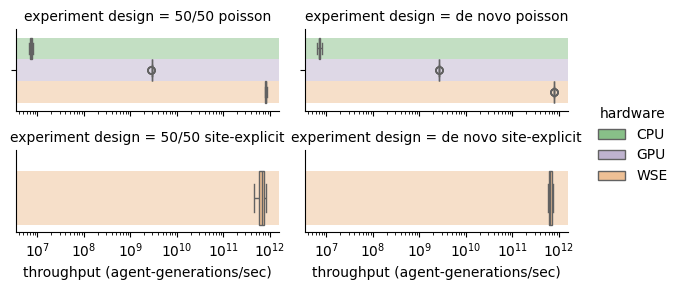

In [8]:
tp.tee(
    backplot,
    data=df.to_pandas(),
    col="experiment design",
    x="throughput (agent-generations/sec)",
    hue="hardware",
    aspect=2,
    col_wrap=2,
    height=1.5,
    orient="h",
    log_scale=(True, False),
    palette=sns.color_palette("Accent"),
    sharey=False,
    teeplot_outexclude="post",
    teeplot_postprocess="""
for ax in teed.axes.flat[2:]:
    ax.set_ylim(0.1, 0.5)
""",
)


In [9]:
df.group_by("hardware", "experiment design",).agg(
    pl.col("throughput (agent-generations/sec)")
    .mean()
    .alias("mean_throughput"),
    pl.col("throughput (agent-generations/sec)").std().alias("std_throughput"),
    pl.col("tsc cycle hertz").mean().alias("mean_speed"),
    pl.col("tsc cycle hertz").std().alias("std_speed"),
)


hardware,experiment design,mean_throughput,std_throughput,mean_speed,std_speed
str,str,f64,f64,f32,f32
"""WSE""","""50/50 poisson""",8.2192e11,2.9740e10,4306.648438,155.83284
"""GPU""","""de novo poisson""",2.6622e9,2.6056e7,176.114853,1.723704
"""CPU""","""de novo poisson""",7.0413e6,502113.15638,4.192197,0.298945
"""GPU""","""50/50 poisson""",2.8646e9,3.9513e7,189.501465,2.613894
"""WSE""","""50/50 site-explicit""",6.7028e11,1.1047e11,3512.122314,578.845947
"""WSE""","""de novo poisson""",7.8222e11,5.2905e8,4098.675781,2.772118
"""WSE""","""de novo site-explicit""",6.5376e11,5.4374e10,3425.558105,284.907532
"""CPU""","""50/50 poisson""",7.3025e6,512242.10246,4.347747,0.304976


## Relative Performance


In [10]:
# Step 1: Filter for GPU and calculate the mean throughput per experiment design
cpu_means = (
    df.filter(pl.col("hardware").str.contains("CPU"))
    .group_by("experiment design")
    .agg(pl.mean("throughput (agent-generations/sec)").alias("cpu_mean"))
)
print(cpu_means)

# Step 2: Join the GPU mean back to the original DataFrame
df_with_mean = df.join(cpu_means, on="experiment design", how="left")

# Step 3: Calculate the speedup by dividing throughput by the GPU mean
df_with_speedup = df_with_mean.with_columns(
    (pl.col("throughput (agent-generations/sec)") / pl.col("cpu_mean")).alias(
        "speedup"
    )
)

# Show the resulting DataFrame with speedup
df_with_speedup


shape: (2, 2)
┌───────────────────┬──────────┐
│ experiment design ┆ cpu_mean │
│ ---               ┆ ---      │
│ str               ┆ f64      │
╞═══════════════════╪══════════╡
│ de novo poisson   ┆ 7.0413e6 │
│ 50/50 poisson     ┆ 7.3025e6 │
└───────────────────┴──────────┘


tsc ticks,tsc seconds,tsc seconds per cycle,tsc cycle hertz,tsc ns per cycle,recv sum,send sum,cycle count,tsc start,tsc end,send N,send S,send E,send W,recv N,recv S,recv E,recv W,tile,row,col,hardware,experiment design,net population size,throughput (agent-generations/sec),cpu_mean,speedup
u64,f32,f32,f32,f32,u32,u32,u32,u64,u64,u32,u32,u32,u32,u32,u32,u32,u32,u32,u16,u16,str,str,i32,f64,f64,f64
0,209.579391,0.209579,4.771461,2.09579392e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,8.0142e6,7.3025e6,1.097456
0,229.492737,0.229493,4.357437,2.29492736e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,7.3188e6,7.3025e6,1.002229
0,228.172424,0.228172,4.382651,2.28172416e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,7.3612e6,7.3025e6,1.008028
0,235.708771,0.235709,4.242524,2.35708768e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,7.1258e6,7.3025e6,0.975798
0,247.554077,0.247554,4.039521,2.4755408e8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""CPU""","""50/50 poisson""",1679616,6.7848e6,7.3025e6,0.929107
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
103685662536,121.983131,0.000244,4098.927246,243966.265625,1000003,4000008,500000,27523,103685690059,1000002,1000002,1000002,1000002,250001,250000,250001,250001,743756,991,506,"""WSE""","""de novo poisson""",190848000,7.8227e11,7.0413e6,111097.992571
103659336568,121.952164,0.000244,4099.968262,243904.328125,1000002,4000008,500000,27559,103659364127,1000002,1000002,1000002,1000002,250000,250000,250001,250001,743756,991,506,"""WSE""","""de novo poisson""",190848000,7.8247e11,7.0413e6,111126.209551
103683860081,121.98101,0.000244,4098.998535,243962.03125,1000000,4000008,500000,27558,103683887639,1000002,1000002,1000002,1000002,250000,250000,250000,250000,743756,991,506,"""WSE""","""de novo poisson""",190848000,7.8229e11,7.0413e6,111099.920971


/usr/local/lib/python3.10/dist-packages/backstrip/_backplot.py:127: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g = sns.catplot(


teeplots/hue=hardware+orient=h+viz=backplot+x=speedup+y=experiment-design+ext=.pdf
teeplots/hue=hardware+orient=h+viz=backplot+x=speedup+y=experiment-design+ext=.png


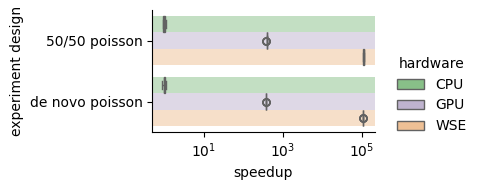

In [11]:
tp.tee(
    backplot,
    data=df_with_speedup.to_pandas(),
    y="experiment design",
    x="speedup",
    hue="hardware",
    aspect=2,
    height=2,
    order=["50/50 poisson", "de novo poisson"],
    orient="h",
    log_scale=(True, False),
    palette=sns.color_palette("Accent"),
)


In [12]:
df_with_speedup.group_by("hardware", "experiment design",).agg(
    pl.col("speedup").mean().alias("mean_speedup"),
    pl.col("speedup").std().alias("std_speedup"),
)


hardware,experiment design,mean_speedup,std_speedup
str,str,f64,f64
"""GPU""","""de novo poisson""",378.091462,3.700527
"""CPU""","""de novo poisson""",1.0,0.07131
"""WSE""","""de novo poisson""",111091.201013,75.135898
"""GPU""","""50/50 poisson""",392.275299,5.410857
"""CPU""","""50/50 poisson""",1.0,0.070146
"""WSE""","""de novo site-explicit""",null,null
"""WSE""","""50/50 poisson""",112551.912107,4072.606743
"""WSE""","""50/50 site-explicit""",null,null
